In [1]:
import pandas as pd
import numpy as np

## Dataset link :
Url = https://raw.githubusercontent.com/SR1608/Datasets/main/coviddata.csv


## 1. Import the dataset using Pandas from above mentioned url.

In [3]:
# Dataset URL
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"

In [5]:
df = pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## 2. High Level Data Understanding

### a. Find no. of rows & columns in the dataset

In [6]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 57394
Number of columns: 49


### b. Data types of columns.

In [7]:
data_types = df.dtypes
print("\nData types of columns:")
print(data_types)


Data types of columns:
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu

### c. Info & describe of data in dataframe.

In [8]:
print("\nInfo of the dataframe:")
df.info()


Info of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_mil

# 3. Low Level Data Understanding

### a. Find count of unique values in location column.

In [12]:
unique_location_count = df['location'].nunique()
print(f"Count of unique values in the 'location' column: {unique_location_count}")

Count of unique values in the 'location' column: 216


### b. Find which continent has the maximum frequency using value_counts

In [13]:
max_continent_frequency = df['continent'].value_counts().idxmax()
print(f"Continent with maximum frequency: {max_continent_frequency}")

Continent with maximum frequency: Europe


### c. Find maximum & mean value in 'total_cases'

In [15]:
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
print(f"Maximum total cases: {max_total_cases}")
print(f"Mean total cases: {mean_total_cases}")

Maximum total cases: 55154651.0
Mean total cases: 167797.3688753302


### d. Find 25%,50% & 75% quartile value in 'total_deaths'.

In [16]:
quartiles_total_deaths = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print("Quartile values in 'total_deaths':")
print(quartiles_total_deaths)

Quartile values in 'total_deaths':
0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


### e. Find which continent has maximum 'human_development_index'.

In [17]:
max_hdi_continent = df.loc[df['human_development_index'].idxmax(), 'continent']
print(f"Continent with maximum 'human_development_index': {max_hdi_continent}")

Continent with maximum 'human_development_index': Europe


### f. Find which continent has minimum 'gdp_per_capita'.

In [18]:
min_gdp_continent = df.loc[df['gdp_per_capita'].idxmin(), 'continent']
print(f"Continent with minimum 'gdp_per_capita': {min_gdp_continent}")

Continent with minimum 'gdp_per_capita': Africa


# 4. Filter the dataframe with columns

Filter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita',' human_development_index'] and update the data frame.

In [19]:
selected_columns = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df_filtered = df[selected_columns]
df = df_filtered.copy()
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


# 5. Data Cleaning

### a. Remove all duplicates observations

In [31]:
df.drop_duplicates(inplace=True)
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498


### b. Find missing values in all columns

In [26]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
missing_values

Missing values in each column:


continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

### c. Remove all observations where continent column value is missing Tip : using subset parameter in dropna

In [32]:
df.dropna(subset=['continent'], inplace=True)
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498


### d. Fill all missing values with 0

In [28]:
df.fillna(0, inplace=True)
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498


# 6. Date time format

### a. Convert date column in datetime format using pandas.to_datetime

In [30]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498



### b. Create new column month after extracting month data from date column.

In [33]:
df['month'] = df['date'].dt.month
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


# 7. Data Aggregation

### Find max value in all columns using groupby function on 'continent' column Tip: use reset_index() after applying groupby & Store the result in a new dataframe named 'df_groupby'. (Use df_groupby dataframe for all further analysis)

In [34]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12


# 8. Feature Engineering

### a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

In [35]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']
df_groupby.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685


# 9. Data Visualization

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
sns.set(style="whitegrid")

### a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

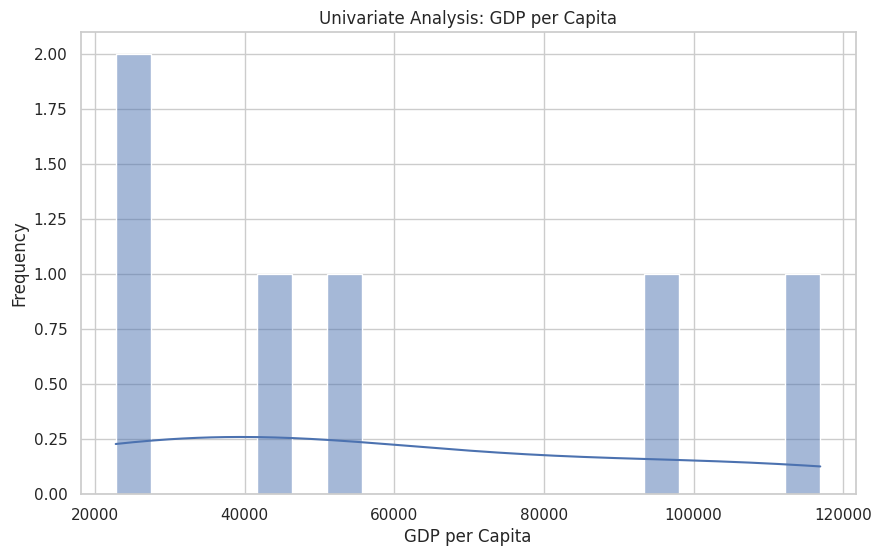

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df_groupby['gdp_per_capita'], bins=20, kde=True)
plt.title('Univariate Analysis: GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

### b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

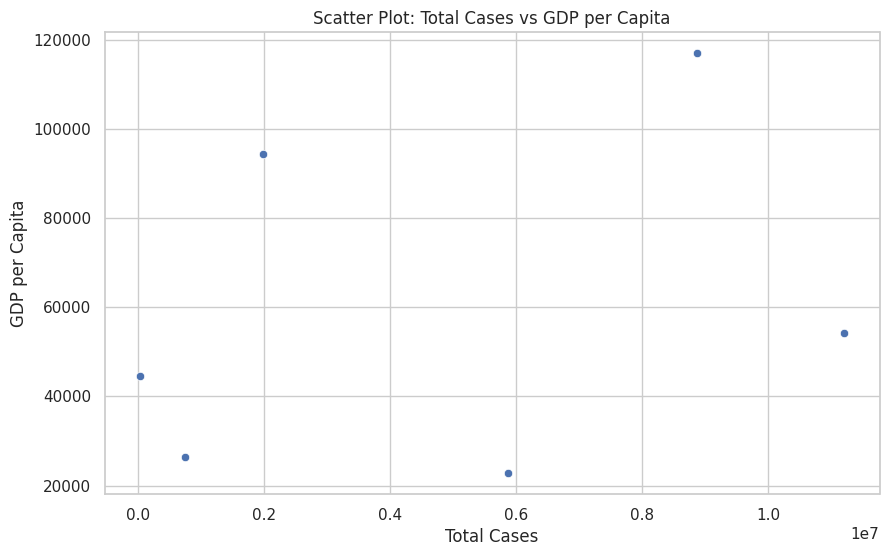

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='gdp_per_capita', data=df_groupby)
plt.title('Scatter Plot: Total Cases vs GDP per Capita')
plt.xlabel('Total Cases')
plt.ylabel('GDP per Capita')
plt.show()

### c. Plot Pairplot on df_groupby dataset.

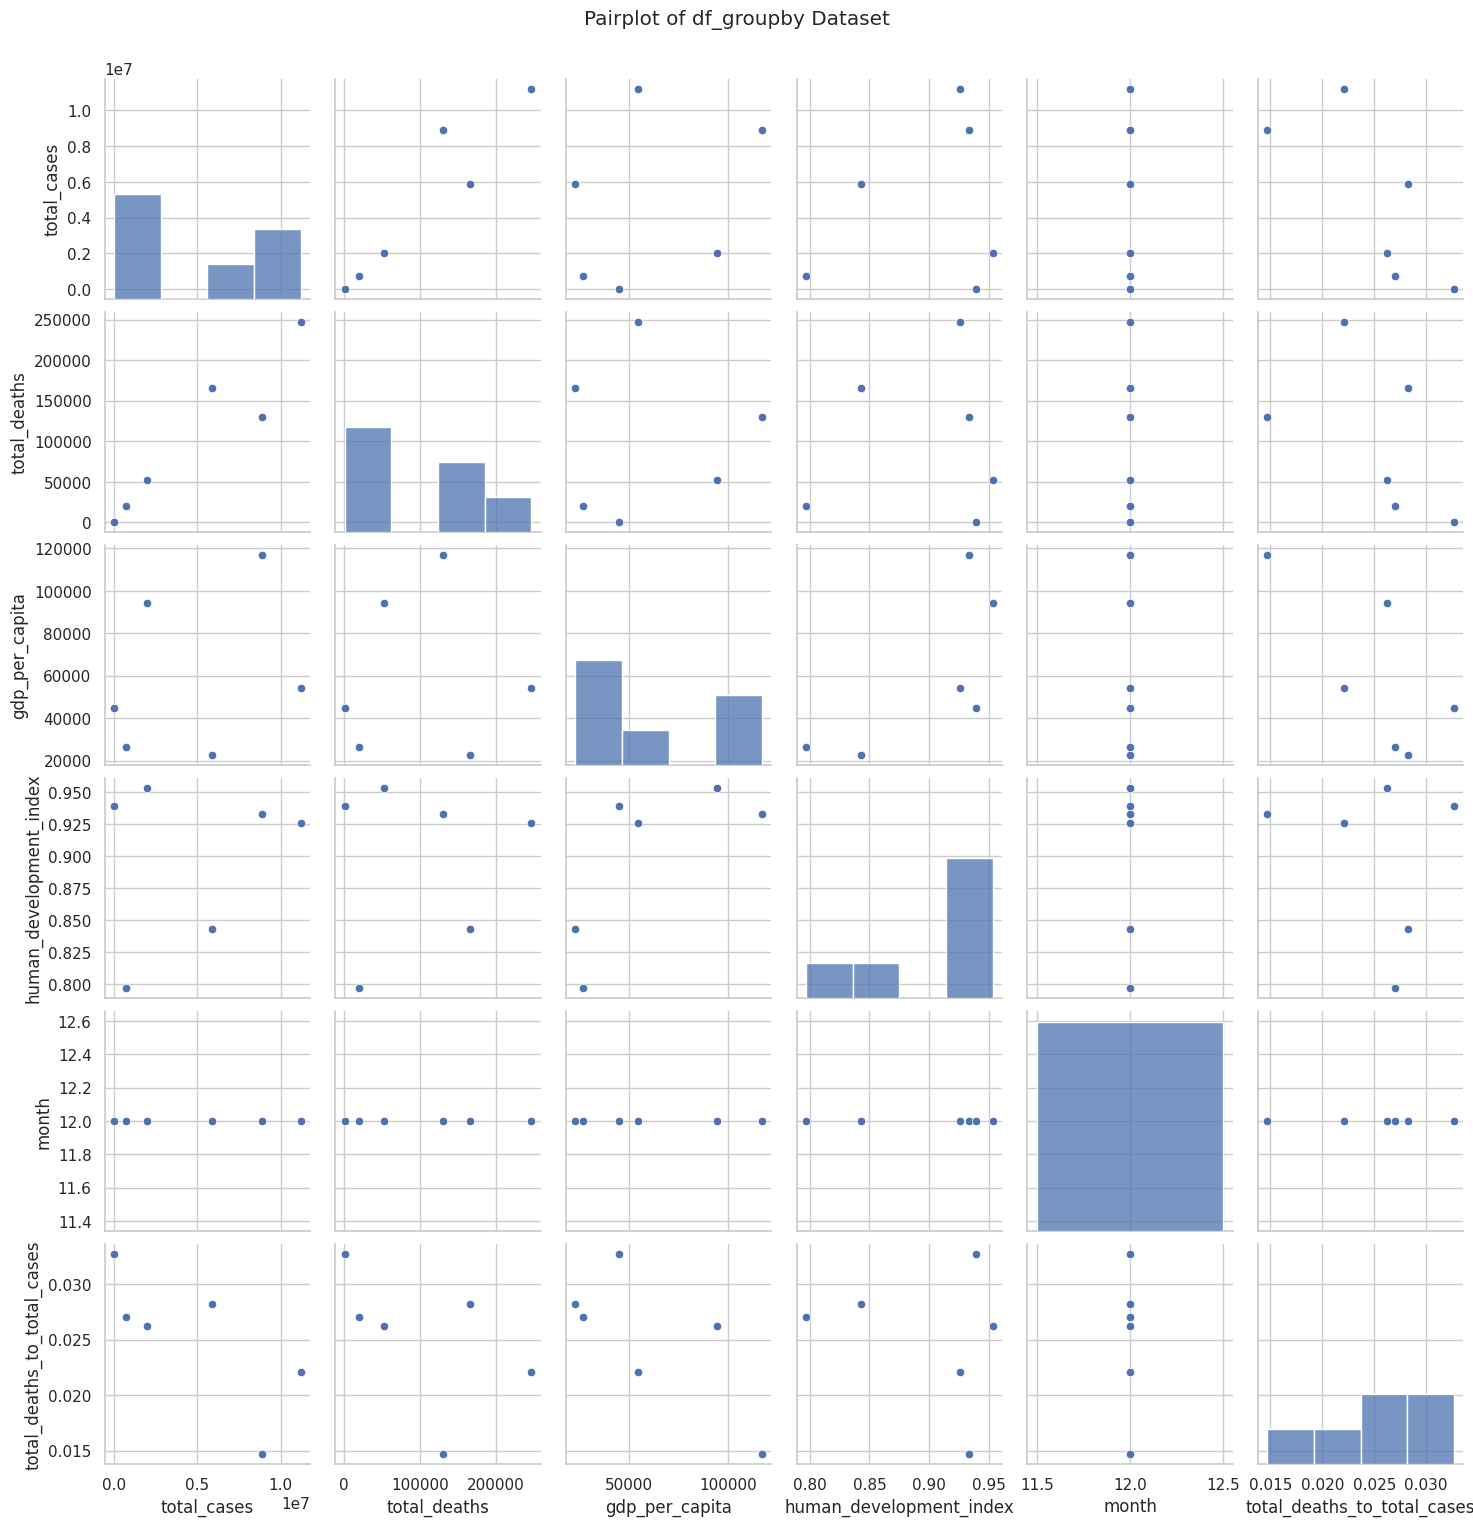

In [40]:
sns.pairplot(df_groupby)
plt.suptitle('Pairplot of df_groupby Dataset', y=1.02)
plt.show()

### d. Plot a bar plot of 'continent' column with 'total_cases' . Tip : using kind='bar' in seaborn catplot

<Figure size 1200x800 with 0 Axes>

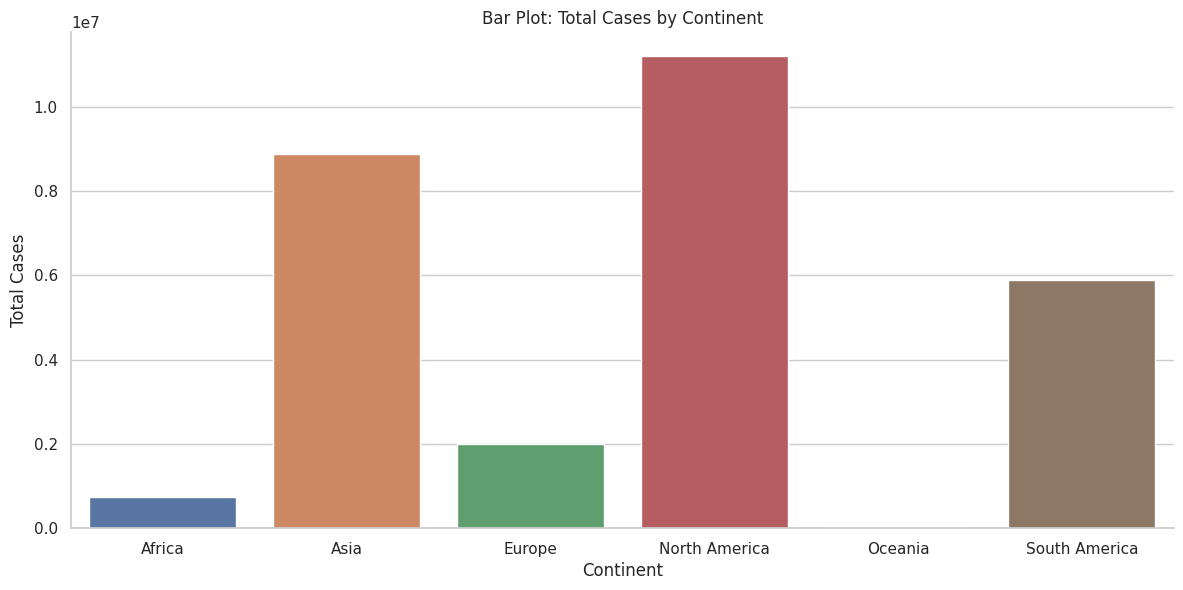

In [41]:
plt.figure(figsize=(12, 8))
sns.catplot(x='continent', y='total_cases', kind='bar', data=df_groupby, height=6, aspect=2)
plt.title('Bar Plot: Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()

# 10.Save the df_groupby dataframe in your local drive using pandas.to_csv function .

In [42]:
df_groupby.to_csv('df_groupby.csv', index=False)